In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

from benchmarks import *
from data_utils import read_crsp_data

In [2]:
df = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", skiprows=4, nrows=25710)
df['date'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.index = df.date
df_rf = df['RF'].astype(float) / 252

In [3]:
idx_df = pd.read_csv('crsp_snpidx_2010_to_2024.csv', dtype={
  'DATE': 'string',
  'vwretd': float
})
idx_df.DATE = pd.to_datetime(idx_df.DATE)
idx_df['vol_20'] = idx_df.vwretd.rolling(20).std()
idx_df['vol_60'] = idx_df.vwretd.rolling(60).std()
idx_df.set_index('DATE', inplace=True)

In [6]:
TIMES_ARR = times_arr
SNP_VAL = (1 + idx_df.vwretd[TIMES_ARR].values).cumprod()

## SEC Models on Old Time (Profit)

In [122]:
result_pickles = [
  ('SEC CNN', 'old_sec_cnn_results.pkl'),
  ('SEC RNN', 'old_sec_rnn_results.pkl'),
  ('SEC MLP', 'old_sec_mlp_results.pkl')
]

In [123]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    times_arr = results['times_arr']
    rf = df_rf[times_arr[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
  sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

snp_val = np.array(results['snp_val'])
port_vals['S&P'] = snp_val
rets = snp_val[1:] / snp_val[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
drawdown = max_drawdown(rets)
stats['S&P'] = [snp_val[-1]-1, sharpe, sortino, drawdown]

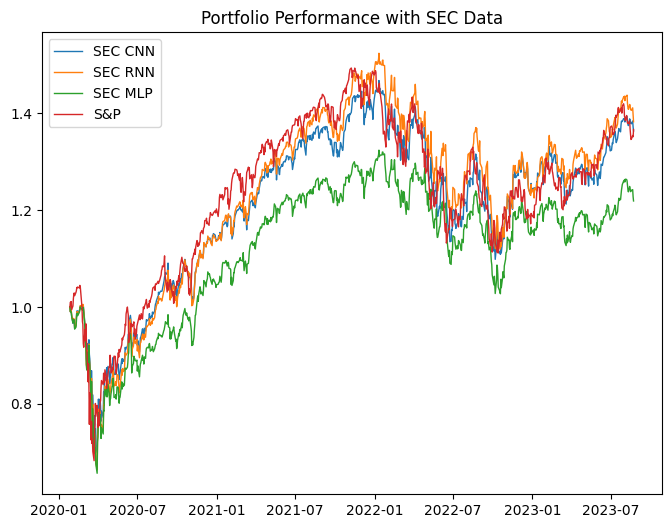

In [124]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(times_arr, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with SEC Data')
plt.show()

In [125]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,SEC CNN,SEC RNN,SEC MLP,S&P
Net Profit,0.363706,0.382724,0.219055,0.366643
Sharpe Ratio,0.476177,0.473569,0.333420,0.466676
Sortino Ratio,-12.934795,-13.135267,-12.793944,-13.472710
Max Drawdown,0.302553,0.339562,0.343780,0.346682


## SEC+News on New Time (Diff Sharpe)

In [126]:
result_pickles = [
  ('SEC+News CNN', 'sec_and_news_cnn_results.pkl'),
  ('SEC+News RNN', 'sec_and_news_rnn_results.pkl'),
  ('SEC+News MLP', 'sec_and_news_MLP_results.pkl')
]

In [127]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    # times_arr = results['times_arr']
    # rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
  sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

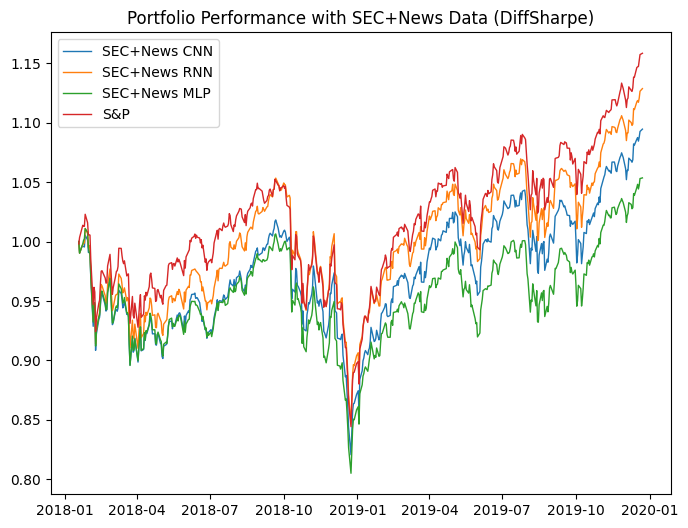

In [128]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with SEC+News Data (DiffSharpe)')
plt.show()

In [129]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,SEC+News CNN,SEC+News RNN,SEC+News MLP,S&P
Net Profit,0.094546,0.128636,0.053514,0.158347
Sharpe Ratio,0.342485,0.444354,0.205204,0.552242
Sortino Ratio,-14.805659,-14.533568,-15.149644,-14.756129
Max Drawdown,0.193996,0.195274,0.200069,0.197728


## SEC on New Time (Diff Sharpe)

In [130]:
result_pickles = [
  ('SEC CNN', 'sec_cnn_results.pkl'),
  ('SEC RNN', 'sec_rnn_results.pkl'),
  ('SEC MLP', 'sec_mlp_results.pkl')
]

In [131]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    # times_arr = results['times_arr']
    # rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
  sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

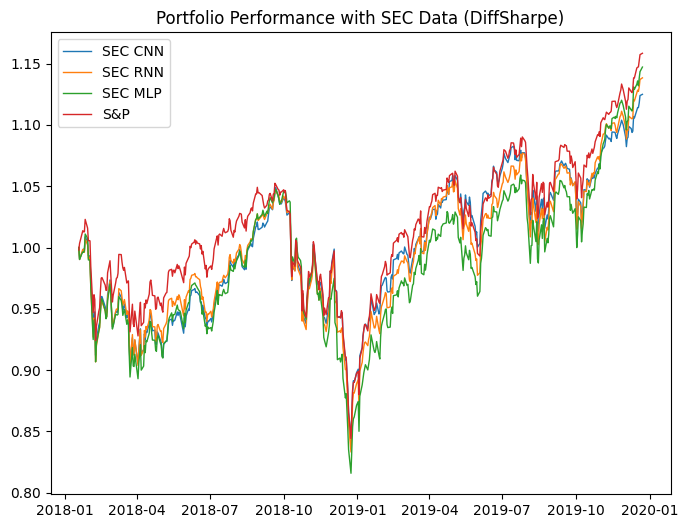

In [132]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with SEC Data (DiffSharpe)')
plt.show()

In [133]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,SEC CNN,SEC RNN,SEC MLP,S&P
Net Profit,0.124870,0.138309,0.147103,0.158347
Sharpe Ratio,0.439863,0.464039,0.482788,0.552242
Sortino Ratio,-14.397950,-14.439768,-14.519536,-14.756129
Max Drawdown,0.195347,0.204159,0.220906,0.197728


## Pure Benchmarks

In [7]:
result_pickles = [
  ('Naive Equal', 'naive_equal_results.pkl'),
  ('Equal Buy-and-Hold', 'equal_and_hold_results.pkl'),
  # ('Best Historical Profit', 'best_profit_stock_results.pkl'),
  ('Best Historical Sharpe', 'best_sharpe_stock_results.pkl'),
  ('OLMAR', 'olmar_1.1_results_decent.pkl'),
  ('WMAMR', 'wmamr_1.1_results_decent.pkl')
]

In [8]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    times_arr = results['times_arr']
    rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
  sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf, annualized=True)
sortino = sortino_ratio(rets, 0, rf=rf, annualized=True)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

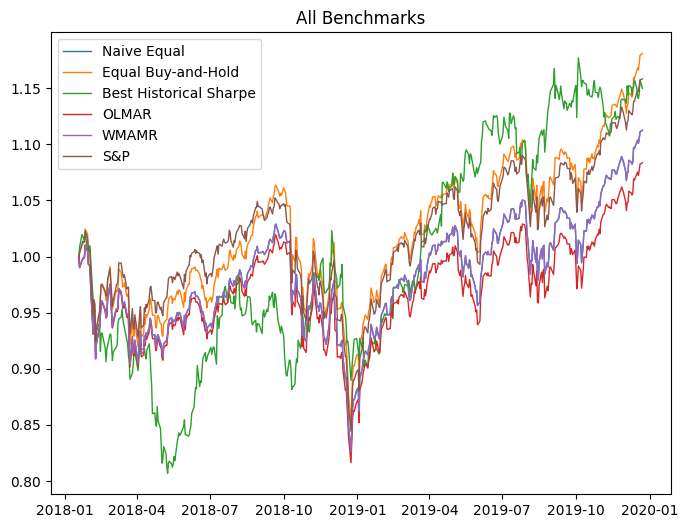

In [9]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('All Benchmarks')
plt.show()

In [10]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,Naive Equal,Equal Buy-and-Hold,Best Historical Sharpe,OLMAR,WMAMR,S&P
Net Profit,0.112583,0.181138,0.149857,0.083634,0.112565,0.158347
Sharpe Ratio,0.392352,0.595225,0.475577,0.300906,0.392310,0.552242
Sortino Ratio,-14.464945,-14.009800,-16.749871,-14.344610,-14.464168,-14.756129
Max Drawdown,0.197294,0.198039,0.210250,0.199240,0.197294,0.197728


## SEC+News on New Time (Profit Reward)

In [11]:
result_pickles = [
  # ('SEC+News CNN', 'combined_cnn_results_lower_action_noise.pkl'),
  # ('SEC+News CNN', 'combined_cnn_0.02_results.pkl'),
  ('SEC+News CNN', 'combined_cnn_optimal_results.pkl'),
  # ('SEC+News RNN', 'combined_rnn_results.pkl'),
  ('SEC+News RNN', 'combined_rnn_0.08_results.pkl'),
  # ('SEC+News MLP', 'combined_mlp_results.pkl')
  ('SEC+News MLP', 'combined_mlp_0.07_results.pkl')
]

In [12]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    # times_arr = results['times_arr']
    # rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf)
  sortino = sortino_ratio(rets, 0, rf=rf)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf)
sortino = sortino_ratio(rets, 0, rf=rf)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

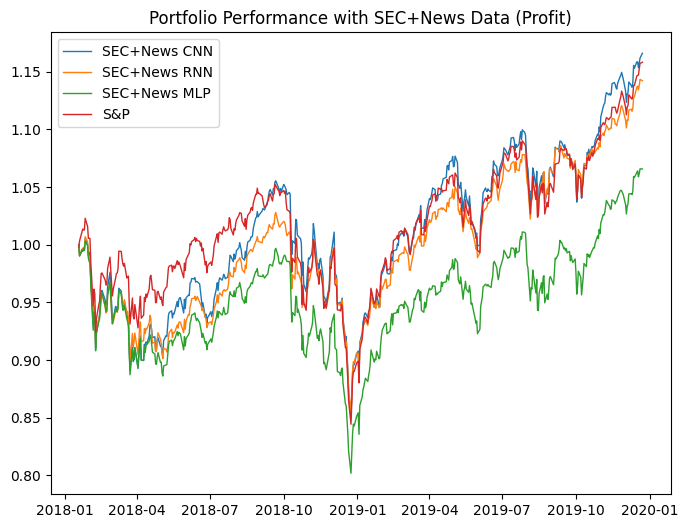

In [13]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with SEC+News Data (Profit)')
plt.show()

In [14]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,SEC+News CNN,SEC+News RNN,SEC+News MLP,S&P
Net Profit,0.166081,0.142287,0.065676,0.158347
Sharpe Ratio,0.034876,0.032710,0.015659,0.034788
Sortino Ratio,-0.902022,-0.929756,-0.939723,-0.929549
Max Drawdown,0.195472,0.170134,0.195750,0.197728


## Pure Historical Price (Profit Reward)

In [11]:
result_pickles = [
  ('Hist Prices CNN', 'pure_cnn_0.02_profit_results.pkl'),
  ('Hist Prices RNN', 'pure_rnn_0.04_profit_results.pkl'),
  ('Hist Prices MLP', 'pure_mlp_0.04_profit_results.pkl')
]

In [12]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    # times_arr = results['times_arr']
    # rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf)
  sortino = sortino_ratio(rets, 0, rf=rf)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf)
sortino = sortino_ratio(rets, 0, rf=rf)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

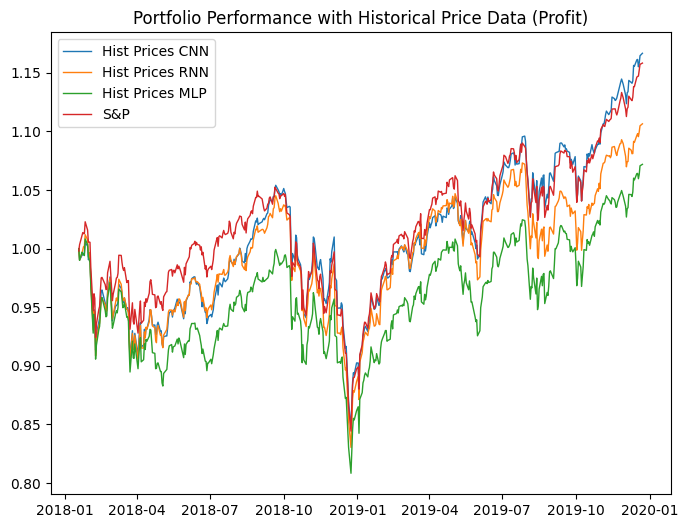

In [13]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with Historical Price Data (Profit)')
plt.show()

In [14]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,Hist Prices CNN,Hist Prices RNN,Hist Prices MLP,S&P
Net Profit,0.166717,0.106518,0.071937,0.158347
Sharpe Ratio,0.035369,0.023293,0.016464,0.034788
Sortino Ratio,-0.940067,-0.952038,-0.961637,-0.929549
Max Drawdown,0.196557,0.205465,0.198329,0.197728


## Pure Historical (DiffSharpe Reward)

In [17]:
result_pickles = [
  ('Hist Prices CNN', 'pure_cnn_0.02_diffsharpe_results.pkl'),
  ('Hist Prices RNN', 'pure_rnn_0.08_diffsharpe_results.pkl'),
  ('Hist Prices MLP', 'pure_mlp_0.07_diffsharpe_results.pkl')
]

In [18]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    # times_arr = results['times_arr']
    # rf = df_rf[times_arr[1:]]
    rf = df_rf[TIMES_ARR[1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf)
  sortino = sortino_ratio(rets, 0, rf=rf)
  drawdown = max_drawdown(rets)
  stats[label] = [port_val[-1]-1, sharpe, sortino, drawdown]

# snp_val = np.array(results['snp_val'])
# port_vals['S&P'] = snp_val
# rets = snp_val[1:] / snp_val[:-1] - 1
port_vals['S&P'] = SNP_VAL
rets = SNP_VAL[1:] / SNP_VAL[:-1] - 1
sharpe = sharpe_ratio(rets, rf=rf)
sortino = sortino_ratio(rets, 0, rf=rf)
drawdown = max_drawdown(rets)
stats['S&P'] = [SNP_VAL[-1]-1, sharpe, sortino, drawdown]

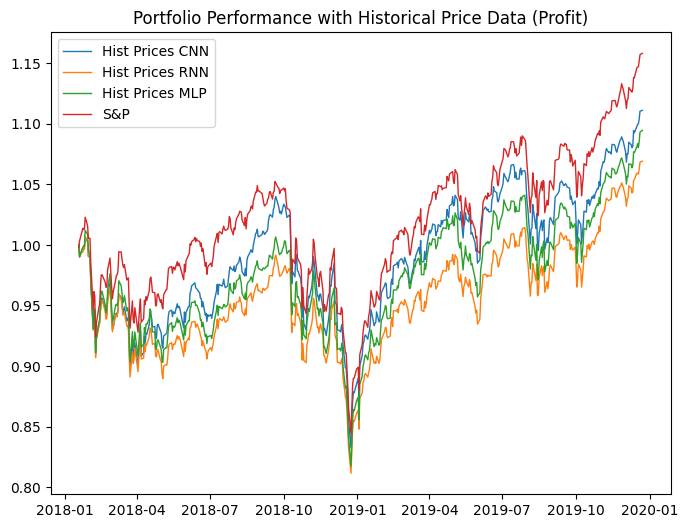

In [19]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(TIMES_ARR, port_val, label=label, lw=1)
plt.legend()
plt.title('Portfolio Performance with Historical Price Data (Profit)')
plt.show()

In [20]:
stats_df = pd.DataFrame(stats, index=["Net Profit", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,Hist Prices CNN,Hist Prices RNN,Hist Prices MLP,S&P
Net Profit,0.111205,0.069154,0.094686,0.158347
Sharpe Ratio,0.024967,0.016562,0.021301,0.034788
Sortino Ratio,-0.910875,-0.944367,-0.928501,-0.929549
Max Drawdown,0.199721,0.194177,0.188082,0.197728
